# PaddleOCR识别中英文产品信息

PaddleOCR是百度开源的超轻量级OCR模型库，提供了数十种文本检测、识别模型，旨在打造一套丰富、领先、实用的文字检测、识别模型/工具库，助力使用者训练出更好的模型，并应用落地。

## Paddle OCR特性：
- 超轻量级中文OCR，总模型仅8.6M
	- 单模型支持中英文数字组合识别、竖排文本识别、长文本识别
	- 检测模型DB（4.1M）+识别模型CRNN（4.5M）
- 多种文本检测训练算法，EAST、DB
- 多种文本识别训练算法，Rosetta、CRNN、STAR-Net、RARE

本项目包括：
- 1. PaddleOCR快速使用
- 2. 文本检测模型的训练方式
- 3. 文件识别模型的训练方式

## 1 PaddleOCR快速使用

本节介绍如何使用PaddleOCR的轻量级模型完成文本检测、识别的任务。

轻量级OCR模型效果：

![](https://ai-studio-static-online.cdn.bcebos.com/75d46fcc525647d2af5f5919773426b070dcbfe15817429b8f12fd069c461b5f)


### 1.1 准备运行环境
首先，安装PaddleOCR的依赖库。

In [1]:
# 安装依赖库
!pip install -r requirments.txt -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 1.8MB 18.4MB/s eta 0:00:01
     |████████████████████████████████| 952kB 28.7MB/s eta 0:00:01
     |████████████████████████████████| 133kB 62.4MB/s eta 0:00:01
     |████████████████████████████████| 870kB 25.6MB/s eta 0:00:01
     |████████████████████████████████| 12.5MB 10.4MB/s eta 0:00:01
     |████████████████████████████████| 133kB 38.0MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 18.7MB/s eta 0:00:01
  Created wheel for lmdb: filename=lmdb-0.98-cp37-cp37m-linux_x86_64.whl size=264303 sha256=72e0933fa19b65a46436b43c66559d7bc5a0f66166bb354ed6e66eed1307b39e
  Stored in directory: /home/aistudio/.cache/pip/wheels/53/a0/7a/eb9ec000443fad79caaa8d70da9a40a54a313c9bb5f682fa36
Successfully built lmdb


### 1.2. 准备inference model和测试图像

中文轻量级OCR模型的inference model，并放在了~/inference 目录下，可以调用如下命令在测试图像上得到识别结果。
也可以通过以下指令下载最新的inference model。

In [2]:
# 下载inference模型 并解压
!wget https://paddleocr.bj.bcebos.com/inference.tar 
! tar xf inference.tar

--2020-05-28 15:16:33--  https://paddleocr.bj.bcebos.com/inference.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9091072 (8.7M) [application/x-tar]
Saving to: ‘inference.tar’

inference.tar       100%[===================>]   8.67M  33.9MB/s    in 0.3s    

2020-05-28 15:16:33 (33.9 MB/s) - ‘inference.tar’ saved [9091072/9091072]



 ~/doc/imgs 文件夹下准备了一些测试图像，也可以上传自己的图像测试我们的OCR模型。

使用代码可视化测试图像，代码如下，

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

## 显示原图，读取名称为11.jpg的测试图像
img_path= "./doc/imgs/11.jpg"
img = Image.open(img_path)
plt.figure("test_img", figsize=(10,10))
plt.imshow(img)
plt.show()

<Figure size 1000x1000 with 1 Axes>

### 1.3. 测试单张图像
下面开始调用tools/infer/predict_system.py 完成图像文本识别，共需要传入三个参数：
- image_dir： 指定要测试的图像
- det_model_dir： 指定轻量检测模型的inference model
- rec_model_dir： 指定轻量识别模型的inference model

In [4]:
# 快速运行
!export PYTHONPATH=. && python tools/infer/predict_system.py --use_gpu=True --image_dir="./doc/imgs/11.jpg" \
    --det_model_dir="./inference/det/"  --rec_model_dir="./inference/rec/"

Predict time of ./doc/imgs/11.jpg: 1.906s
纯臻营养护发素, 0.944
产品信息/参数, 0.984
（45元/每公斤，100公斤起订）, 0.922
每瓶22元，1000瓶起订）, 0.960
【品牌】, 0.953
：代加工方式/0EMODM, 0.939
【品名】, 0.879
：纯臻营养护发素, 0.946
【产品编号】, 0.849
J：YM-X-3011, 0.887
ODMOEM, 0.992
【净含量】：220ml, 0.871
【适用人群】, 0.959
：适合所有肤质, 0.986
鲸蜡硬脂醇, 0.896
【主要成分】, 0.937
燕麦B-葡聚, 0.850
椰油酰胺丙基甜菜碱、, 0.894
糖、, 0.877
泛酯, 0.558
（成品包材）, 0.988
【主要功能】, 0.949
：可紧致头发磷层, 0.969
美，从而达到, 0.866
即时持久改善头发光泽的效果，给干燥的头, 0.969
发足够的滋养, 0.947
The visualized image saved in ./inference_results/11.jpg


输出结果中有两列数据，第一列表示PaddleOCR识别出的文字，第二列表示识别出当前文字的置信度。置信度的数据范围是[0-1]，置信度越接近1表示文本识别对的“信心”越大。

如下输出结果中：
```
纯臻营养护发素, 0.944
产品信息/参数, 0.984
```
表示识别文本为 “纯臻营养护发素” 的置信度是0.944， 识别“产品信息/参数” 的置信度是0.984。

同时，识别结果会可视化在图像中并保存在./inference_results文件夹下，可以通过左边的目录结构选择要打开的文件，
也可以通过如下代码将可视化后的图像显示出来，观察OCR文本识别的效果。

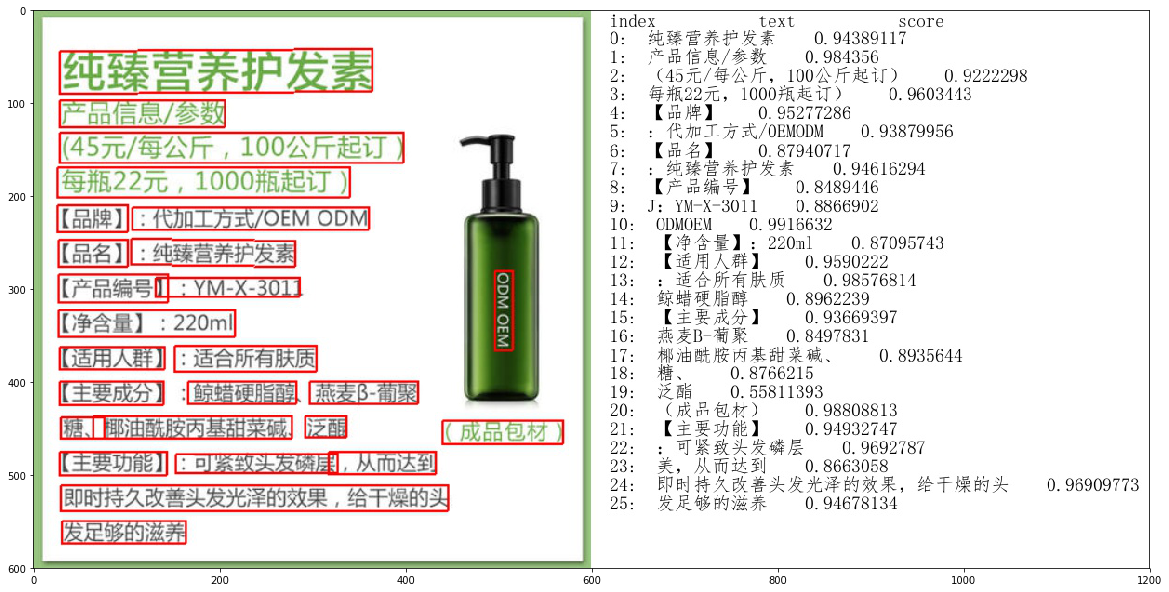

In [5]:
## 显示轻量级模型识别结果
img_path= "./inference_results/11.jpg"
img = Image.open(img_path)
plt.figure("results_img", figsize=(20,20))
plt.imshow(img)
plt.show()

### 1.4 测试多张图像
image_dir支持传入单张图像和图像所在的文件目录，当image_dir指定的是图像目录时，运行上述指令会预测当前文件夹下的所有图像中的文字，并将预测的可视化结果保存在inference_results文件夹下。

In [6]:
# 预测doc/imgs文件夹下的所有图像
!export PYTHONPATH=. && python tools/infer/predict_system.py --use_gpu=True --image_dir="./doc/imgs" \
    --det_model_dir="./inference/det/"  --rec_model_dir="./inference/rec/"

Predict time of ./doc/imgs/22.jpg: 1.843s
小度在家1S, 0.993
多功能专属儿童空间, 0.994
高IQ流畅语音交互, 0.944
14:53, 0.950
到手价, 0.981
最热音乐专辑，, 0.941
，春风十里不如你, 0.948
329, 0.995
￥, 0.688
The visualized image saved in ./inference_results/22.jpg
Predict time of ./doc/imgs/5.jpg: 0.091s
约定, 0.847
最终相遇, 0.819
The visualized image saved in ./inference_results/5.jpg
Predict time of ./doc/imgs/2.jpg: 0.092s
防止刮花再无划痕, 0.959
经过钢化处理，, 0.991
，增强贴膜吸附性和桑软性，在易贴不脱的情况工, 0.876
同时科学防震缓冲硬物撞击，, 0.917
不裂开, 0.906
长期防止划痕的产生坚固耐用, 0.954
10:00, 0.953
休息的时候听听歌, 0.854
The visualized image saved in ./inference_results/2.jpg
Predict time of ./doc/imgs/8.jpg: 0.051s
通知, 0.963
根据上级有关文件精神，从2016, 0.977
年4月20日开始皙停二手房交易业, 0.954
务，何时恢复办理另行通知。, 0.962
茶机房店, 0.521
香河县住房保障和房产管理局, 0.888
2016年4月19日, 0.998
The visualized image saved in ./inference_results/8.jpg
Predict time of ./doc/imgs/7.jpg: 0.056s
没有吃饱只有一个, 0.912
烦恼, 0.519
吃饱了就有, 0.905
烦恼！, 0.610
无数个, 0.971
The visualized image saved in ./inference_results/7.jpg
Predict time of ./doc/imgs/3.jpg: 

图像文本识别结果可视化：

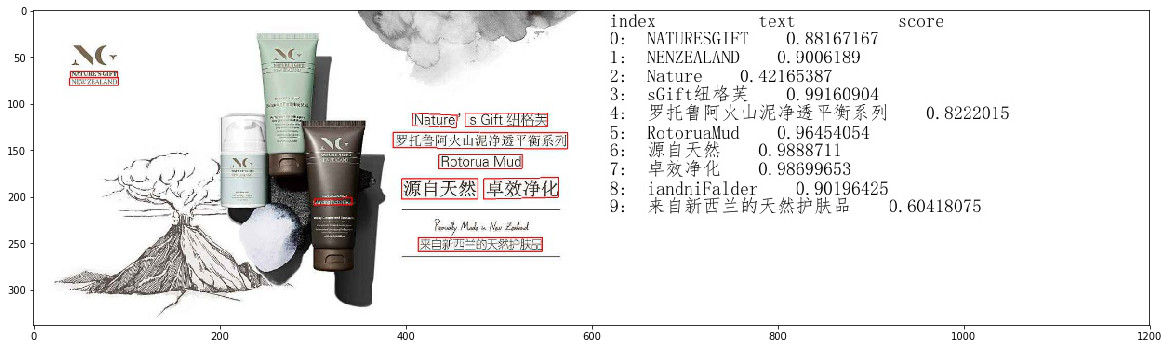

In [9]:
## 显示轻量级模型识别结果
## 可视化1.jpg的文本识别效果
img_path= "./inference_results/4.jpg"
img = Image.open(img_path)
plt.figure("results_img", figsize=(20,20))
plt.imshow(img)
plt.show()

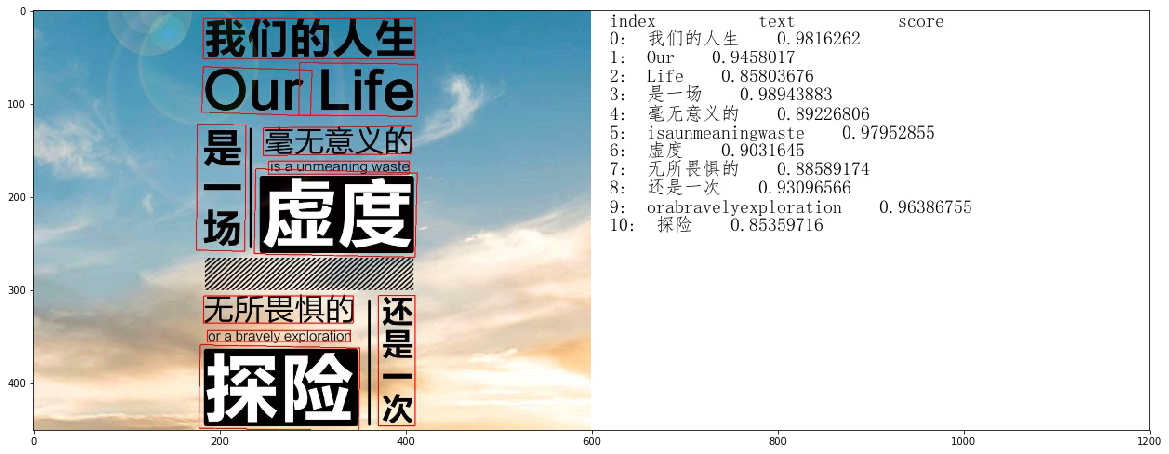

In [10]:
## 显示轻量级模型识别结果
## 可视化12.jpg的文本识别效果
img_path= "./inference_results/15.jpg"
img = Image.open(img_path)
plt.figure("results_img", figsize=(20,20))
plt.imshow(img)
plt.show()

## 2. 训练文字检测模型

本节以icdar15数据集为例，介绍如何完成PaddleOCR中文字检测模型的训练、评估与测试。

### 2.1. 数据准备
icdar15的数据集，存放在 ~/data/data34815/icdar2015.tar 中，可以运行如下指令完成数据集解压。

In [11]:
!cd data/data34815/ && tar xf icdar2015.tar && mv icdar2015  ~/train_data/


运行上述指令后 ~/train_data/icdar2015/text_localization 有两个文件夹和两个文件，分别是：
```
~/train_data/icdar2015/text_localization 
  └─ icdar_c4_train_imgs/         icdar数据集的训练数据
  └─ ch4_test_images/             icdar数据集的测试数据
  └─ train_icdar2015_label.txt    icdar数据集的训练标注
  └─ test_icdar2015_label.txt     icdar数据集的测试标注
```


提供的标注文件格式为：
```
" 图像文件名                    json.dumps编码的图像标注信息"
ch4_test_images/img_61.jpg    [{"transcription": "MASA", "points": [[310, 104], [416, 141], [418, 216], [312, 179]], ...}]
```
json.dumps编码前的图像标注信息是包含多个字典的list，字典中的$points$表示文本框的四个点的坐标(x, y)，从左上角的点开始顺时针排列。
$transcription$表示当前文本框的文字，在文本检测任务中并不需要这个信息。
如果您想在其他数据集上训练PaddleOCR，可以按照上述形式构建标注文件。


### 2.2 快速启动训练

首先下载pretrain model，PaddleOCR的检测模型目前支持两种backbone，分别是MobileNetV3、ResNet50_vd，
您可以根据需求使用[PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/master/ppcls/modeling/architectures)中的模型更换backbone。

In [12]:

# 下载MobileNetV3的预训练模型
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/MobileNetV3_large_x0_5_pretrained.tar
! cd pretrain_models/ && tar xf MobileNetV3_large_x0_5_pretrained.tar
# 下载ResNet50的预训练模型
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_vd_ssld_pretrained.tar
! cd pretrain_models/ && tar xf ResNet50_vd_ssld_pretrained.tar

--2020-05-28 15:18:14--  https://paddle-imagenet-models-name.bj.bcebos.com/MobileNetV3_large_x0_5_pretrained.tar
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 182.61.200.229, 182.61.200.195
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9974980 (9.5M) [application/x-tar]
Saving to: ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.tar’

MobileNetV3_large_x 100%[===================>]   9.51M  23.9MB/s    in 0.4s    

2020-05-28 15:18:15 (23.9 MB/s) - ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.tar’ saved [9974980/9974980]

--2020-05-28 15:18:16--  https://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_vd_ssld_pretrained.tar
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 182.61.200.195, 182.61.200.229
Connecting to paddle-imagene

In [13]:
# 训练backbone为MobileNetV3的db算法的检测模型
!export PYTHONPATH=. && python3 tools/train.py -c configs/det/det_db_mv3.yml 

2020-05-28 15:18:27,102-INFO: {'Global': {'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 1200, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/det_db/', 'save_epoch_step': 200, 'eval_batch_step': 5000, 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 16, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_db_icdar15_reader.yml', 'pretrain_weights': './pretrain_models/MobileNetV3_large_x0_5_pretrained/', 'checkpoints': None, 'save_res_path': './output/det_db/predicts_db.txt', 'save_inference_dir': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_mobilenet_v3,MobileNetV3', 'scale': 0.5, 'model_name': 'large'}, 'Head': {'function': 'ppocr.modeling.heads.det_db_head,DBHead', 'model_name': 'large', 'k': 50, 'inner_channels': 96, 'out_channels': 2}, 'Loss': {'function': 'ppocr.modeling.losses.det_db_loss,DBLoss', 'balance_loss': True, 'main_loss_t


上述指令中，通过-c 选择训练使用configs/det/det_db_mv3.yml配置文件。
有关配置文件的详细解释，请参考/doc目录下的config.md。

也可以通过-o参数在不需要修改yml文件的情况下，改变训练的参数，比如，调整训练的学习率为0.0001
```
python3 tools/train.py -c configs/det/det_db_mv3.yml -o Optimizer.base_lr=0.0001
```



### 2.3. 测试检测效果

测试单张图像的检测效果

In [14]:
!export PYTHONPATH=. && python3 tools/infer_det.py -c configs/det/det_db_mv3.yml -o TestReader.single_img_path="./doc/imgs/11.jpg"

{'Global': {'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 1200, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/det_db/', 'save_epoch_step': 200, 'eval_batch_step': 5000, 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 16, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_db_icdar15_reader.yml', 'pretrain_weights': './pretrain_models/MobileNetV3_large_x0_5_pretrained/', 'checkpoints': None, 'save_res_path': './output/det_db/predicts_db.txt', 'save_inference_dir': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_mobilenet_v3,MobileNetV3', 'scale': 0.5, 'model_name': 'large'}, 'Head': {'function': 'ppocr.modeling.heads.det_db_head,DBHead', 'model_name': 'large', 'k': 50, 'inner_channels': 96, 'out_channels': 2}, 'Loss': {'function': 'ppocr.modeling.losses.det_db_loss,DBLoss', 'balance_loss': True, 'main_loss_type': 'DiceLoss', 'alpha': 5, 

测试文件夹下所有图像的检测效果

In [15]:

!export PYTHONPATH=. && python3 tools/infer_det.py -c configs/det/det_db_mv3.yml -o TestReader.single_img_path="./doc/imgs/11.jpg"

{'Global': {'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 1200, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/det_db/', 'save_epoch_step': 200, 'eval_batch_step': 5000, 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 16, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_db_icdar15_reader.yml', 'pretrain_weights': './pretrain_models/MobileNetV3_large_x0_5_pretrained/', 'checkpoints': None, 'save_res_path': './output/det_db/predicts_db.txt', 'save_inference_dir': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_mobilenet_v3,MobileNetV3', 'scale': 0.5, 'model_name': 'large'}, 'Head': {'function': 'ppocr.modeling.heads.det_db_head,DBHead', 'model_name': 'large', 'k': 50, 'inner_channels': 96, 'out_channels': 2}, 'Loss': {'function': 'ppocr.modeling.losses.det_db_loss,DBLoss', 'balance_loss': True, 'main_loss_type': 'DiceLoss', 'alpha': 5, 

## 3. 训练文字识别模型


### 3.1. 数据准备
在 ~/data/data34824/ 目录下准备了数据集，可以使用如下指令解压数据文件。

In [1]:
#!cd data/data34824/ &&  unzip -o -q ic15_rec.zip && tar xf ic15.tar && mv ic15-data/
!mkdir train_data/ic15_data
!cd data/data34824/ && cp ic15_rec.zip ~/train_data/ic15_data/ && cd ~/train_data/ic15_data/ && unzip -o -q ic15_rec.zip && tar -xf ic15.tar


若您本地没有数据集，可以在官网下载 [icdar2015](http://rrc.cvc.uab.es/?ch=4&com=downloads) 数据，用于快速验证。也可以参考[DTRB](https://github.com/clovaai/deep-text-recognition-benchmark#download-lmdb-dataset-for-traininig-and-evaluation-from-here)，下载 benchmark 所需的lmdb格式数据集。

* 使用自己数据集：

若您希望使用自己的数据进行训练，请参考下文组织您的数据。

- 训练集

首先请将训练图片放入同一个文件夹（train_images），并用一个txt文件（rec_gt_train.txt）记录图片路径和标签。

* 注意： 默认请将图片路径和图片标签用 \t 分割，如用其他方式分割将造成训练报错

```
" 图像文件名                 图像标注信息 "

train_data/train_0001.jpg   简单可依赖
train_data/train_0002.jpg   用科技让复杂的世界更简单
```
最终训练集应有如下文件结构：

```
|-train_data
    |-ic15_data
        |- rec_gt_train.txt
        |- train
            |- word_001.png
            |- word_002.jpg
            |- word_003.jpg
            | ...
```

- 测试集

同训练集类似，测试集也需要提供一个包含所有图片的文件夹（test）和一个rec_gt_test.txt，测试集的结构如下所示：

```
|-train_data
    |-ic15_data
        |- rec_gt_test.txt
        |- test
            |- word_001.jpg
            |- word_002.jpg
            |- word_003.jpg
            | ...
```
### 3.2. 快速启动训练

首先下载pretrain model，PaddleOCR的检测模型目前支持两种backbone，分别是MobileNetV3、ResNet50_vd，
可以根据需求使用[PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/master/ppcls/modeling/architectures)中的模型更换backbone。
本节将以 CRNN 识别模型为例：

首先下载pretrain model，可以下载训练好的模型在 icdar2015 数据上进行finetune。

In [3]:
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/rec_mv3_none_bilstm_ctc.tar
!cd pretrain_models && tar -xf rec_mv3_none_bilstm_ctc.tar && rm -rf rec_mv3_none_bilstm_ctc.tar

--2020-05-28 15:25:29--  https://paddleocr.bj.bcebos.com/rec_mv3_none_bilstm_ctc.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.195, 182.61.200.229
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25964544 (25M) [application/x-tar]
Saving to: ‘./pretrain_models/rec_mv3_none_bilstm_ctc.tar’

rec_mv3_none_bilstm 100%[===================>]  24.76M  23.2MB/s    in 1.1s    

2020-05-28 15:25:30 (23.2 MB/s) - ‘./pretrain_models/rec_mv3_none_bilstm_ctc.tar’ saved [25964544/25964544]



开始训练

In [7]:
#!export PYTHONPATH=. && python3 tools/train.py -c configs/rec/rec_icdar15_train.yml
!export PYTHONPATH=. && python3 tools/train.py -c configs/rec/rec_mv3_none_bilstm_ctc.yml

2020-05-28 15:37:11,066-INFO: {'Global': {'algorithm': 'CRNN', 'use_gpu': True, 'epoch_num': 72, 'log_smooth_window': 20, 'print_batch_step': 10, 'save_model_dir': 'output/rec_CRNN', 'save_epoch_step': 3, 'eval_batch_step': 2000, 'train_batch_size_per_card': 256, 'test_batch_size_per_card': 256, 'image_shape': [3, 32, 100], 'max_text_length': 25, 'character_type': 'en', 'loss_type': 'ctc', 'reader_yml': './configs/rec/rec_benchmark_reader.yml', 'pretrain_weights': None, 'checkpoints': None, 'save_inference_dir': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.rec_model,RecModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.rec_mobilenet_v3,MobileNetV3', 'scale': 0.5, 'model_name': 'large'}, 'Head': {'function': 'ppocr.modeling.heads.rec_ctc_head,CTCPredict', 'encoder_type': 'rnn', 'SeqRNN': {'hidden_size': 96}}, 'Loss': {'function': 'ppocr.modeling.losses.rec_ctc_loss,CTCLoss'}, 'Optimizer': {'function': 'ppocr.optimizer,AdamDecay', 'base_lr': 0.001, 'beta1': 

### 3.3 测试识别效果

测试单张图像的识别结果

In [19]:
#import TestReader
#!export PYTHONPATH=. &&  python3 tools/infer_rec.py -c configs/rec/rec_chinese_lite_train.yml -o Global.checkpoints=./output/rec_CRNN/best_accuracy TestReader.infer_img=./doc/imgs_word/word_1.jpg
!export PYTHONPATH=. &&  python3 tools/infer_rec.py -c configs/rec/rec_mv3_none_bilstm_ctc.yml -o Global.checkpoints=./output/rec_CRNN/best_accuracy -o TestReader.infer_img=./doc/imgs/15.jpg

Traceback (most recent call last):
  File "tools/infer_rec.py", line 40, in <module>
    from ppocr.data.reader_main import test_reader
ImportError: cannot import name 'test_reader' from 'ppocr.data.reader_main' (/home/aistudio/ppocr/data/reader_main.py)


测试文件夹下所有图像的文字识别效果

In [12]:
!export PYTHONPATH=. &&  python3 tools/infer_rec.py -c configs/rec/rec_mv3_none_bilstm_ctc.yml -o Global.checkpoints=./output/rec_CRNN/best_accuracy TestReader.infer_img=./doc/imgs_word/

Traceback (most recent call last):
  File "tools/infer_rec.py", line 40, in <module>
    from ppocr.data.reader_main import test_reader
ImportError: cannot import name 'test_reader' from 'ppocr.data.reader_main' (/home/aistudio/ppocr/data/reader_main.py)
